## **Analyzing Events From Soccer/Football Games**
## Tutorial - Dev Vadalia

In this tutorial we will be utilizing a kaggle dataset that describes over 900,000 events from more than 9,000 football games across Europe. Our goal will be to look at the subset of events that solely pertain to shots taken and determine if it is possible to predict if a shot will be a goal utilizing the different variables from the dataset.

Dataset: https://www.kaggle.com/secareanualin/football-events

To begin, we will start by importing 2 important libraries that will aid us in our task. Numpy is useful for any numeric operations that might be required. Pandas is a library that will allow us to read in the data from the file and store it in a dataframe, a useful data structure to allow for data analysis on a large scale.

In [244]:
import numpy as np
import pandas as pd

df = pd.read_csv('events.csv/events.csv')


Let's take a look at what information the data contains. Having read the file to the dataframe, we use the function info() to display useful information regarding the data. From this we can see how many entries are in the dataframe, the name and type of each column, and the number of non-null entries are in each column.

In [250]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

Having seen all attributes from the dataset, we will now create a new dataframe that only contains the subset of information regarding shots. To do this, we only include an event if it is of type 1, defined in the dictionary file as an attempt on goal. Furthermore, we only take the columns that we think could be related to shooting and scoring a goal. $$ $$
These include: 
* Time
* Side (Whether the player shooting is home or away)
* Shot Place
* Shot Outcome
* Whether it is a goal
* Location the shot was taken
* Bodypart used to shoot
* Situation in which the shot was taken
* How the player was assisted
* Whether it was a fast-break

In [278]:
shots_df = df[df['event_type']==1][[ 'is_goal', 'time', 'side', 'shot_place', 'shot_outcome', 'location', 'bodypart', 'situation', 'assist_method', 'fast_break']]
shots_df.head()


,is_goal,time,side,shot_place,shot_outcome,location,bodypart,situation,assist_method,fast_break
0,0,2,2,6.0,2.0,9.0,2.0,1.0,1,0
11,0,14,1,13.0,2.0,15.0,1.0,1.0,1,0
13,1,17,1,4.0,1.0,9.0,2.0,1.0,1,0
14,0,19,1,2.0,3.0,15.0,1.0,1.0,0,0
17,0,20,2,2.0,3.0,15.0,1.0,1.0,0,0


Now that we have created a proper dataframe including the relevant information, let's visualize our data. First we are going to import matplotlib.pyplot which will be used to create our graphics. To find how many shots were taken with each bodypart, we group by the column bodypart and count the number of occurrences. We will then replicate the procedure with all goals to see if there is a difference in the two distributions. A pie chart will be used to display both figures.

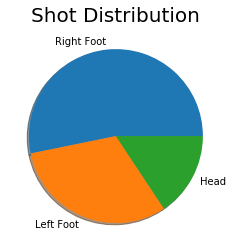

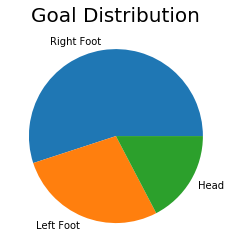

In [279]:
import matplotlib.pyplot as plt

shot_distribution = shots_df.groupby('bodypart')['time'].count()
goal_distribution = shots_df[shots_df['is_goal']==1].groupby('bodypart')['time'].count()

shots_taken = [shot_distribution[1], shot_distribution[2], shot_distribution[3]]
bodyparts = ['Right Foot', 'Left Foot', 'Head']

how_scored = [goal_distribution[1], goal_distribution[2], goal_distribution[3]]

plt.figure()
plt.pie(shots_taken, labels=bodyparts, shadow=True)
plt.title('Shot Distribution', fontsize=20)

plt.figure()
plt.pie(how_scored, labels=bodyparts)
plt.title('Goal Distribution', fontsize=20)
plt.show()

Not surprisingly, both charts look very similar signifying there is not one bodypart with a significant advantage in scoring goals compared to the others.

Next, we will visualize where the shots were taken from compared to the number of goals scored from each location. The data will be shown in a horizontal bar graph to show which locations were the most popular to shoot from and which ones lead to the most goals.

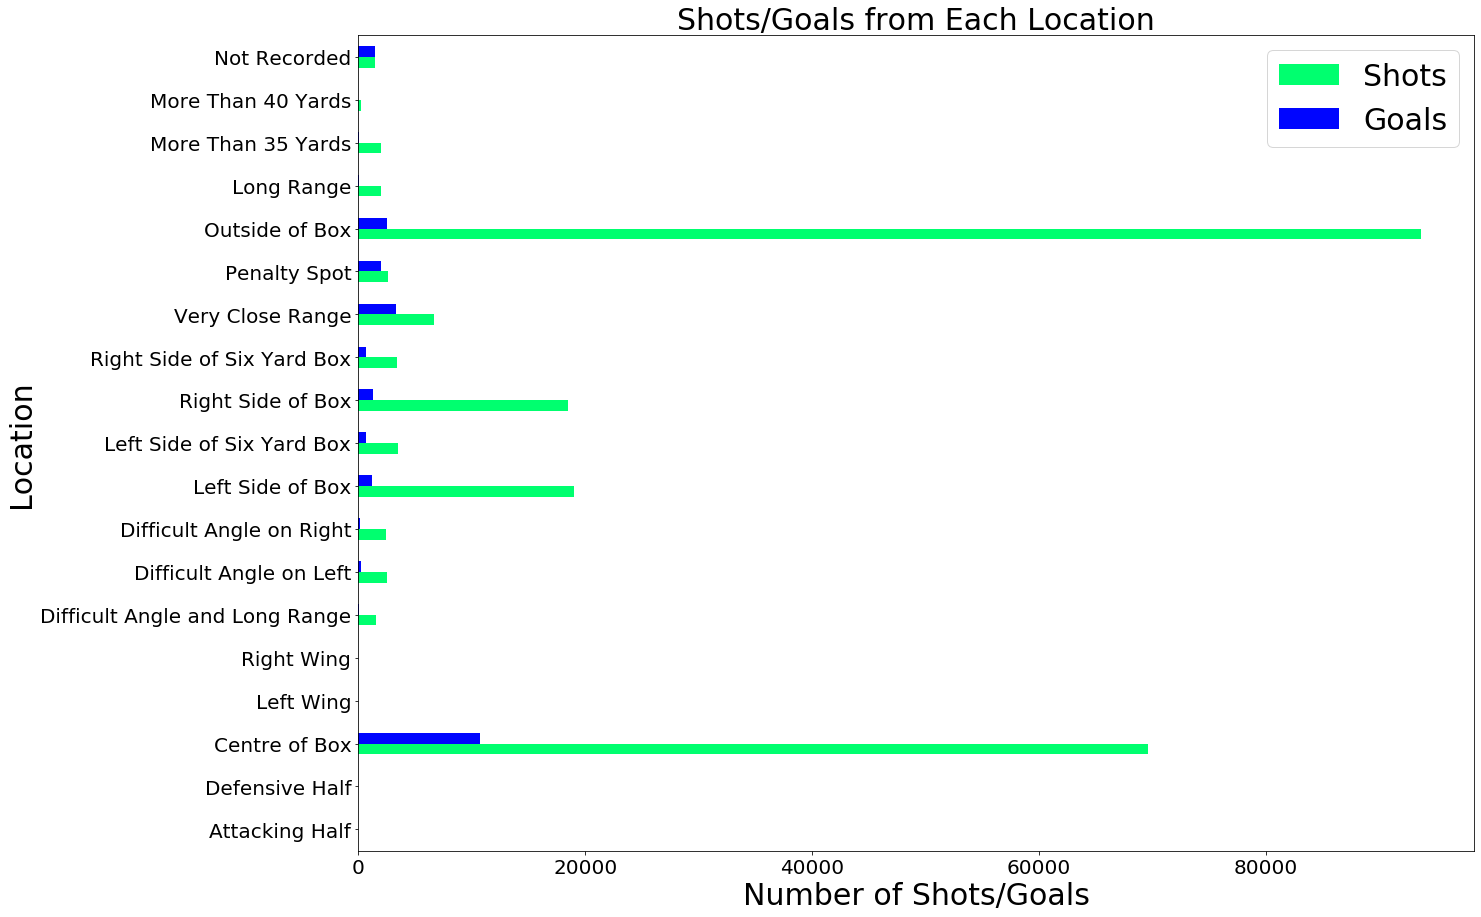

In [280]:
# Taken from dictionary text file 
locations = ['Attacking Half', 'Defensive Half', 'Centre of Box', 'Left Wing', 'Right Wing', 'Difficult Angle and Long Range', 'Difficult Angle on Left', 'Difficult Angle on Right', 'Left Side of Box', 'Left Side of Six Yard Box', 'Right Side of Box', 'Right Side of Six Yard Box', 'Very Close Range', 'Penalty Spot', 'Outside of Box', 'Long Range', 'More Than 35 Yards', 'More Than 40 Yards', 'Not Recorded']

# Create new column with description of location
shots_df['pitch_location'] = [locations[int(loc)-1] for loc in shots_df['location']]
bar_df = pd.DataFrame(index=locations, columns=['Shots', 'Goals'])

# Counting occurrences will give number of shots and summing is_goal will give number of goals
bar_df['Shots'] = shots_df.groupby('pitch_location')['is_goal'].count()
bar_df['Goals'] = shots_df.groupby('pitch_location')['is_goal'].sum()

bar_df.plot.barh(stacked=False,figsize=(20,15), fontsize=20, color =['#00FF6F','#0005FF'])
plt.title('Shots/Goals from Each Location', fontsize=30)
plt.ylabel('Location', fontsize=30)
plt.xlabel('Number of Shots/Goals', fontsize=30)
plt.legend(prop={'size':30})
plt.show()

As we might have guessed, most goals were produced from inside of the 18-yard box however the most shots were taken from outside the box, an area with a lower goal to shot ratio. 

Now, let's take a look at where the shots were placed and which areas of the goal are most effective to shoot at. By recreating the steps from the last visualization and adjusting the column to shot placement, we can visualize where the shots ended up.

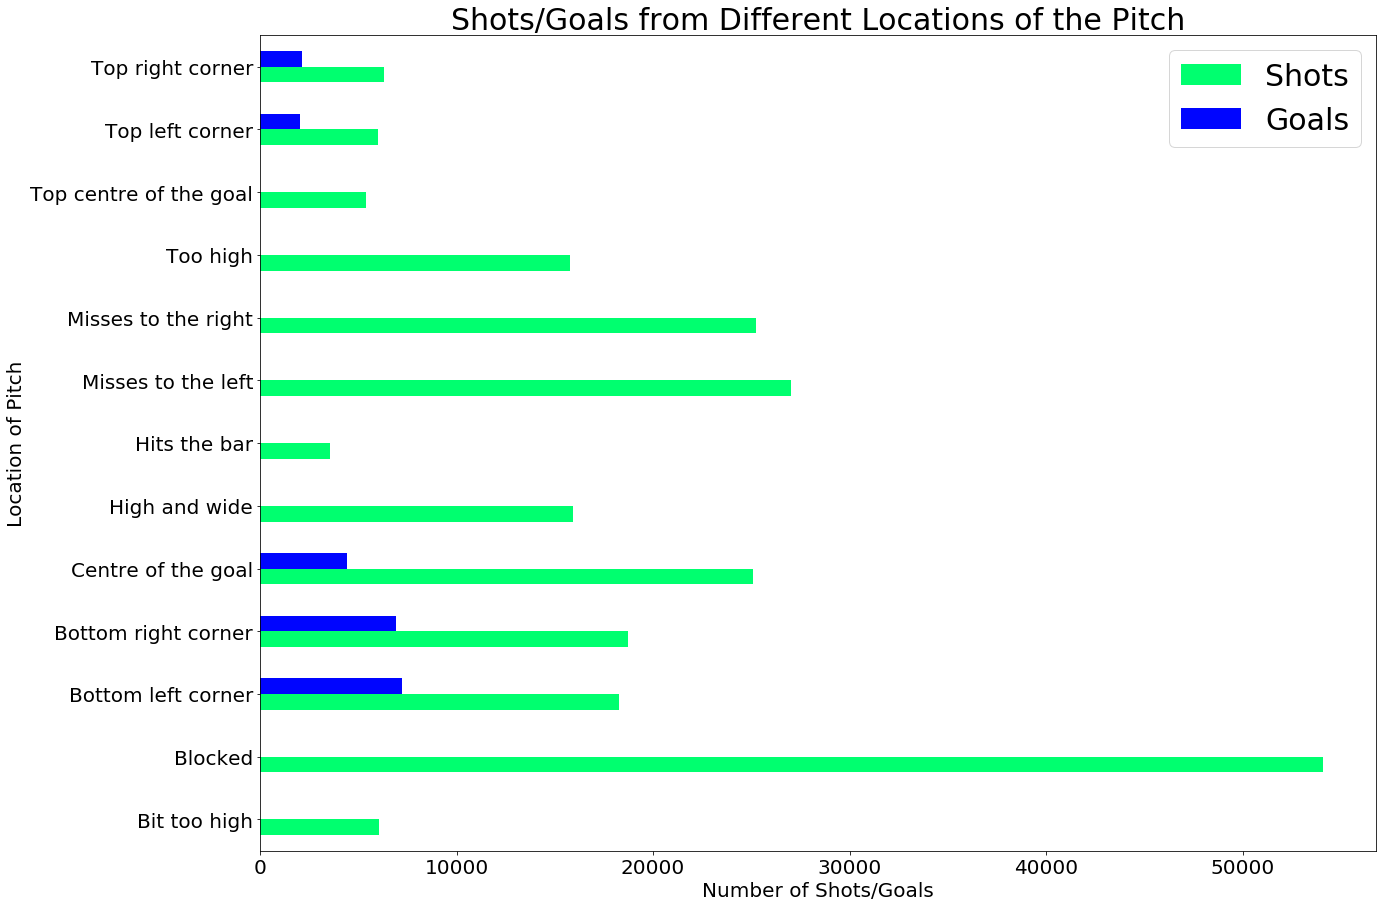

In [281]:
# Taken from dictionary text file
shot_placements = ['Bit too high', 'Blocked', 'Bottom left corner', 'Bottom right corner', 'Centre of the goal', 'High and wide', 'Hits the bar', 'Misses to the left', 'Misses to the right', 'Too high', 'Top centre of the goal', 'Top left corner', 'Top right corner']

bar_df = pd.DataFrame(index=shot_placements, columns=['Shots', 'Goals'])

# Create new column with description of shot placement for each shot
shots_df['shot_placement'] = [shot_placements[int(sp)-1] if pd.notnull(sp) else 'Not Applicable' for sp in shots_df['shot_place']]

bar_df['Shots'] = shots_df.groupby('shot_placement')['is_goal'].count().drop(['Not Applicable'])
bar_df['Goals'] = shots_df.groupby('shot_placement')['is_goal'].sum().drop(['Not Applicable'])

bar_df.plot.barh(stacked=False,figsize=(20,15), fontsize=20, color =['#00FF6F','#0005FF'])
plt.title('Shots/Goals from Different Locations of the Pitch', fontsize=30)
plt.ylabel('Location of Pitch', fontsize=20)
plt.xlabel('Number of Shots/Goals', fontsize=20)
plt.legend(prop={'size':30})
plt.show()

Our final visualization will be a bar graph to see when in the game goals were scored. We will be using a different procedure to achieve this. Since there are 90+ minutes in a soccer game, we will be splitting our options into 10 equal sized ranges each representing 10 minute intervals. By using the apply() function, we apply the pandas function cut() that assigns each entry one of the ten 10 minute intervals. Then we group our dataset by each time period, sum the number of goals in each group and display the results in the bar graph. 

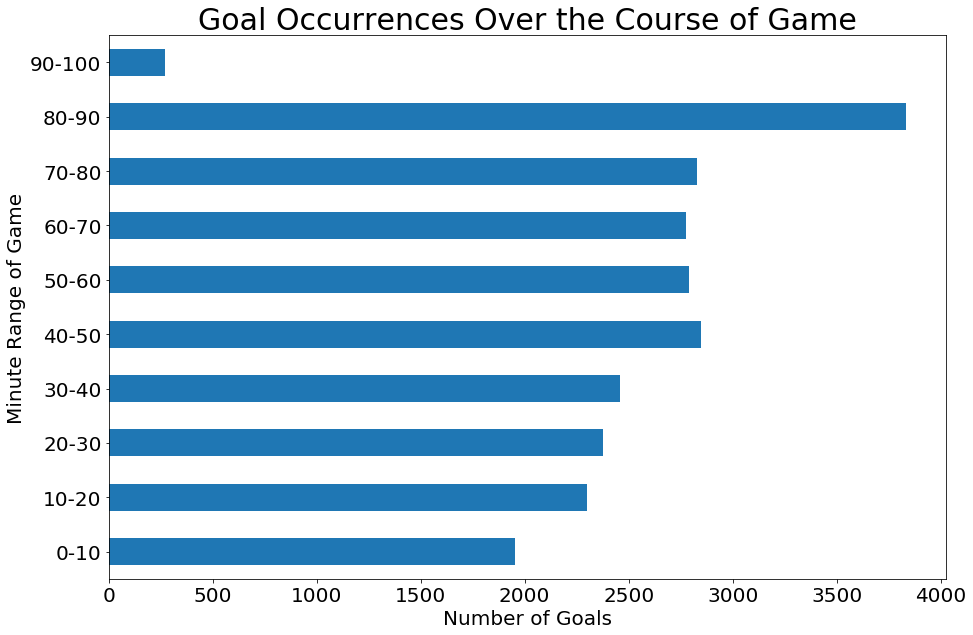

In [282]:
shots_df['time_period'] = shots_df[['time']].apply(lambda x: pd.cut(x, 10))

# Creates a nicer looking string for visualization purposes
shots_df['time_period'] = [str(int(t_p.left)) + '-' + str(int(t_p.right)) for t_p in shots_df['time_period']]

shots_df[shots_df['is_goal']==1][['time_period','is_goal']].groupby('time_period').sum().plot.barh(legend=False, figsize=(15,10), fontsize=20)

plt.ylabel('Minute Range of Game', fontsize=20)
plt.xlabel('Number of Goals', fontsize=20)
plt.title('Goal Occurrences Over the Course of Game', fontsize=30)
plt.show()

The graph shows that as the game goes on there are more goals scored. This trend is broken by the 90-100 minute interval however this is explained by the fact that many games have fewer than 5 minutes in this period to play resulting in less time to score goals.

Now that we have some idea of what the information we are working with looks like, we can begin our main goal of seeing if it is possible to predict if a shot is a goal based on the parameters we have. First we will be running a linear regression to see if there is indeed an interaction between the parameters that we have collected and the result of if the shot is a goal.

In [283]:
import statsmodels.formula.api as sm

simple_res = sm.ols('is_goal~location+time_period+shot_placement+bodypart+side+situation+assist_method', data=shots_df).fit()
simple_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                is_goal   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     4181.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        15:51:37   Log-Likelihood:                -9905.4
No. Observations:              229135   AIC:                         1.987e+04
Df Residuals:                  229107   BIC:                         2.016e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.0457      0.005     -9.607      0.000      -0.055      -0.036
time_period[T.10-20]                         0.0020      0.002      0.814      0.416      -0.003       0.007
time_period[T.20-30]                         0.0046      0.002      1.886      0.059      -0.000       0.009
time_period[T.30-40]                         0.0050      0.002      2.072      0.038       0.000       0.010
time_period[T.40-50]                         0.0084      0.002      3.522      0.000       0.004       0.013
time_period[T.50-60]                         0.0051      0.002      2.136      0.033       0.000       0.010
time_period[T.60-70]                         0.0058      0.002      2.408      0.016       0.001       0.010
time_period[T.70-80]                         0.0083      0.002      3.473      0.001       0.004       0.013
time_period[T.80-90]                         0.0072      0.002      3.194      0.001       0.003       0.012
time_period[T.90-100]                        0.0212      0.006      3.762      0.000       0.010       0.032
shot_placement[T.Blocked]                    0.0553      0.003     15.840      0.000       0.048       0.062
shot_placement[T.Bottom left corner]         0.4319      0.004    114.223      0.000       0.424       0.439
shot_placement[T.Bottom right corner]        0.4077      0.004    108.129      0.000       0.400       0.415
shot_placement[T.Centre of the goal]         0.2194      0.004     59.842      0.000       0.212       0.227
shot_placement[T.High and wide]              0.0284      0.004      7.420      0.000       0.021       0.036
shot_placement[T.Hits the bar]               0.0146      0.005      2.734      0.006       0.004       0.025
shot_placement[T.Misses to the left]         0.0211      0.004      5.855      0.000       0.014       0.028
shot_placement[T.Misses to the right]        0.0216      0.004      5.975      0.000       0.015       0.029
shot_placement[T.Not Applicable]             1.0337      0.007    148.084      0.000       1.020       1.047
shot_placement[T.Too high]                   0.0109      0.004      2.844      0.004       0.003       0.018
shot_placement[T.Top centre of the goal]     0.0519      0.005     10.884      0.000       0.043       0.061
shot_placement[T.Top left corner]            0.3680      0.005     79.719      0.000       0.359       0.377
shot_placement[T.Top right corner]           0.3701      0.005     81.198      0.000       0.361       0.379
location                                    -0.0048      0.000    -41.573      0.000      -0.005      -0.005
bodypart                                    -0.0172      0.001    -21.424      0.000      -0.019      -0.016
side                           

By seeing that the P value of all variables except 2 time periods are less than 0.05, we have reason to believe that there is a statistical significant relationship between our variables and whether a goal is scored. We will carry on by attempting to create a model that will be able to predict whether a shot will be a goal and analyze the performance of the model.

In order to do this we are going to create a seperate dataframe that only contains numerical values. The operations that we previously did to add descriptors for shot placement, location on pitch, and time period were beneficial for visualization, however when creating a model we will need to be handling only numerical values. In addition to doing this, we will be only be including the shots that were on target. Including all shots will increase the accuracy of our model because it will know that a shot not on target can not be a goal, however this is not very useful information for us. 

In [314]:
model_df = df[df['event_type']==1][[ 'is_goal', 'time', 'side', 'shot_place', 'shot_outcome', 'location', 'bodypart', 'situation', 'assist_method', 'fast_break']].dropna()

# ensures we only get shots that were on goal to remove the easy distinction that shots not on target are not a goal
model_df = model_df[model_df['shot_place'].apply(lambda x: x in [3, 4, 5, 12, 13])]

y = model_df[model_df.columns[0]].to_numpy() # the results of each shot: 0 = no goal, 1 = goal
train_data = model_df[model_df.columns[1:]].to_numpy() # variables the model will be trained on


Having created the new dataframe along with a training set and results set, we are ready to create our test. What we will actually be using a random forest classifier. This is a type of model that leverages the utility of decision trees while addressing the shortcomings of decision trees. The data is actually split into 10 partitions for the purpose of having 10 different models to be tested. Each model uses 9 of the partitions to train the model and the remaining partition as a validation set and this enables it to be able to create useful models without the need of an extremely large amount of data.


In [315]:
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

def get_roc_data(model, cv_obj, train_data):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (train, test) in enumerate(cv_obj.split(train_data, y)):
        model.fit(train_data[train], y[train])
        scores = model.predict_proba(train_data[test])[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(y[test],scores)
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])
        
        aucs.append(sklearn.metrics.auc(fpr, tpr))
        
    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0
    
    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=50)

parameters = {}
model = sklearn.model_selection.GridSearchCV(rf, parameters, cv=5)
cv = sklearn.model_selection.StratifiedKFold(n_splits=10)

curve_df, auc_df = get_roc_data(model, cv, train_data)


The data we will be analyzing is the true positive rate (tpr) and the false positive rate (fpr). In other words, when did our model correctly predict a goal was the outcome and when did it incorrectly predict a goal as the outcome. By plotting the curve of tpr vs fpr, we can see how good our model was at predicting goals. This curve that is produced is called an ROC (Receiver Operating Characteristic) curve. We hope to see a high tpr for all fpr. One way of judging the model is by seeing the area under this ROC (AUROC). The closer the AUROC is to 1, the better a model is. Let's find out how our model did.

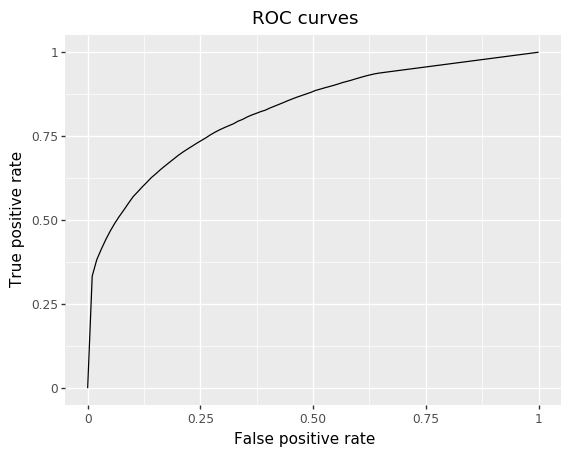

<ggplot: (-9223371883965008040)>

In [317]:
from plotnine import *

mean_curve_df = curve_df.groupby(['fpr']).agg({'tpr': 'mean'}).reset_index()
(ggplot(mean_curve_df, aes(x='fpr', y='tpr')) +
    geom_line() +
    labs(title = "ROC curves",
         x = "False positive rate",
         y = "True positive rate"))

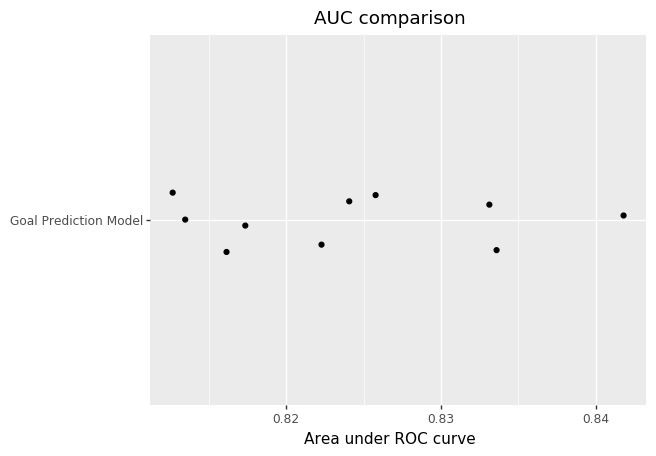

<ggplot: (-9223371883956462464)>

In [320]:
auc_df['model'] = 'Goal Prediction Model'
(ggplot(auc_df, aes(x='model', y='auc')) + 
     geom_jitter(position=position_jitter(0.1)) +
     coord_flip() +
     labs(title = "AUC comparison",
          x="",
          y="Area under ROC curve"))

We can see that our models were between 0.8 and 0.85 for the AUROC. Additionally, the ROC curve shows that we were able to achieve a ~75% true positive rate with ~25% false positive rate. This performance, while not great, was pretty good. The curve looked properly logarithmic instead of linear meaning that there was some significance to the data we gave our model. Overall, it was a good result.

Thank you for coming through this data tutorial with me, I hope you learned something and are able to analyze data better going forth!